In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

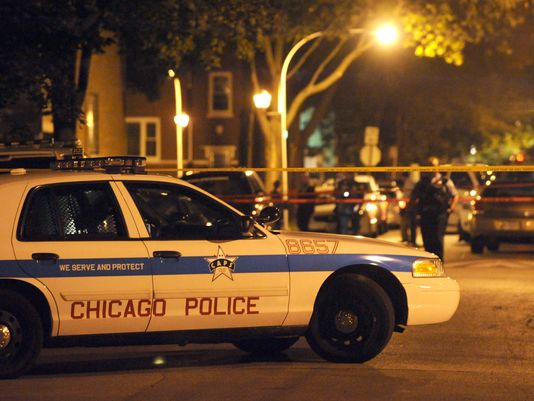

In [3]:
from IPython.display import Image
Image("crime.jpg")

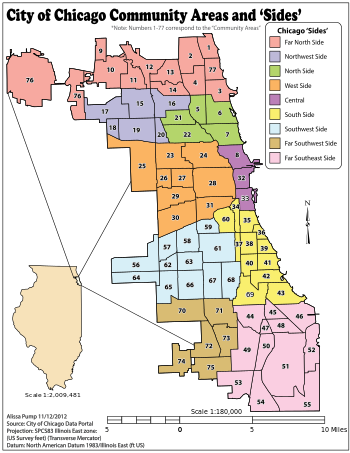

In [4]:
from IPython.display import Image
Image("comm.png")

In [5]:
data = pd.read_csv('crimes.csv')
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2211,22,19.0,74.0,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)"
1,11561837,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,734,7,6.0,67.0,11,1168573.0,1857018.0,2018,01/17/2019 02:26:36 PM,41.763181,-87.657709,"(41.763181359, -87.657709477)"
2,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,613,6,21.0,71.0,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)"
3,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,1233,12,25.0,31.0,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)"
4,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,621,6,17.0,71.0,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)"


- COMMUNITY AREA: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6
- FBI CODE: http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html

In [6]:
# Clean the data.

data = data.drop(['ID', 'Case Number', 'IUCR', 'Beat', 'Ward', 'Updated On'], axis=1)

In [7]:
data.head(2)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,22,74.0,14,1158309.0,1829936.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)"
1,12/31/2018 11:59:00 PM,013XX W 72ND ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,7,67.0,11,1168573.0,1857018.0,2018,41.763181,-87.657709,"(41.763181359, -87.657709477)"


## Here, we are going to find out different crimes in Chicago from 2013 - 2018.
### To do so, I am going to follow these steps:
1. What kind of crime happens the most?
2. Which neighborhood/community area has the most crimes?
3. Where does it happen more often? Apartment or street?

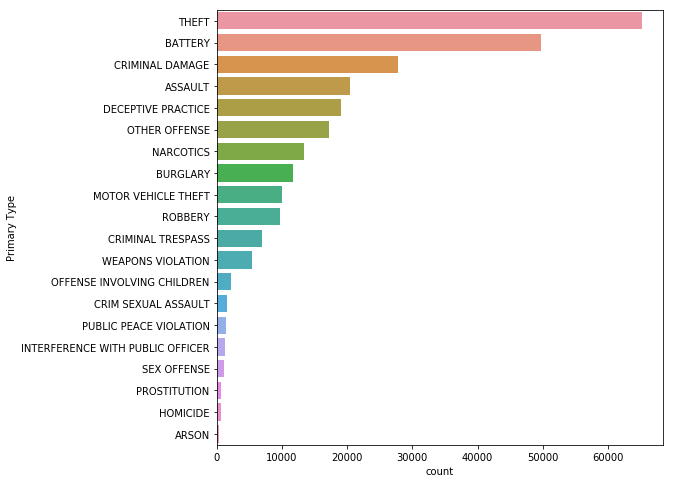

In [8]:
# Let's count how many times each crimes happened for the last 5 years.

plt.figure(figsize=(8, 8))
sns.countplot(data=data, y='Primary Type', order=data['Primary Type'].value_counts().iloc[0:20].index)

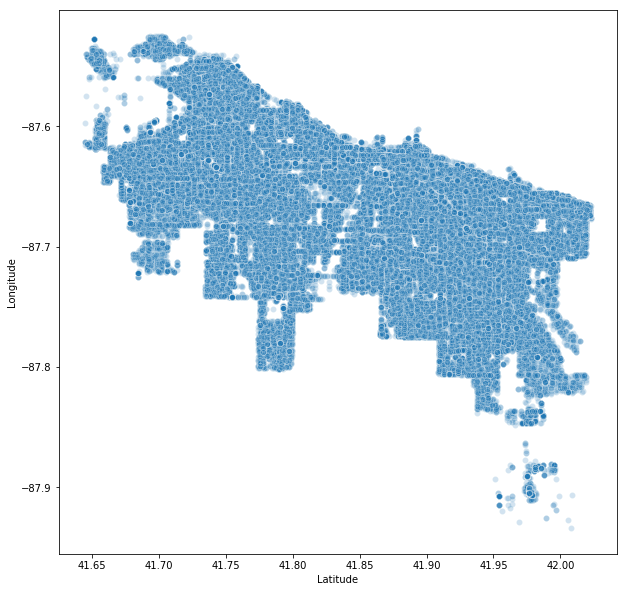

In [9]:
# Now, let's see where these crimes occur!

plt.figure(figsize=(10,10))
sns.scatterplot(x='Latitude', y='Longitude', alpha=0.2, data=data)

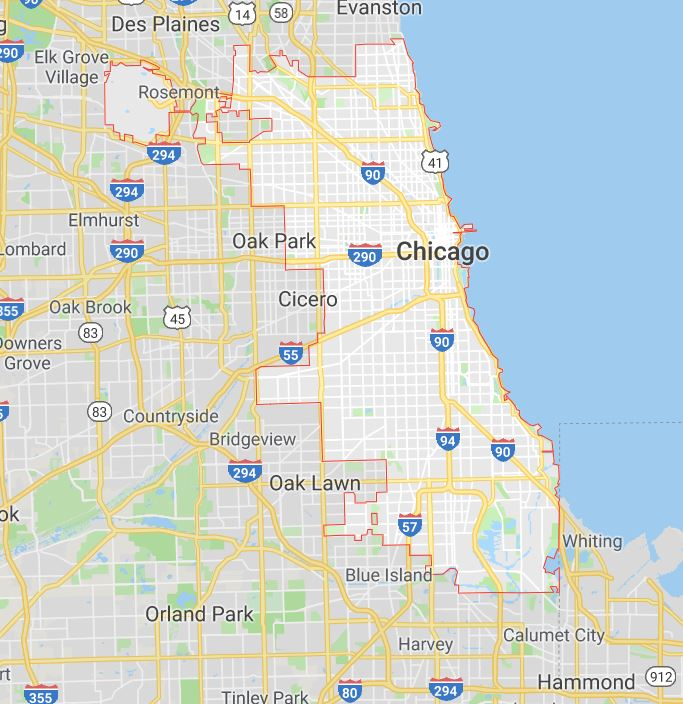

In [10]:
# To compare with actual map of Chicago

from IPython.display import Image
Image("map.jpg", width=350, height=350)

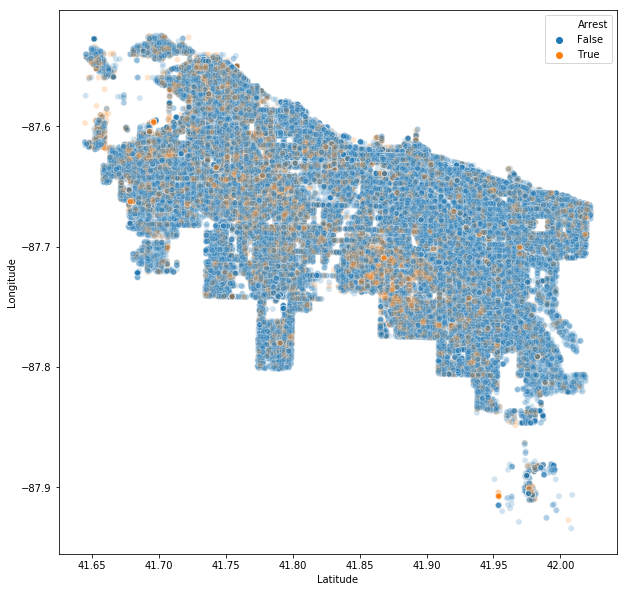

In [11]:
# Areas that arrest happened - Yellow color

plt.figure(figsize=(10,10))
sns.scatterplot(x='Latitude', y='Longitude', hue='Arrest', alpha=0.2, data=data)

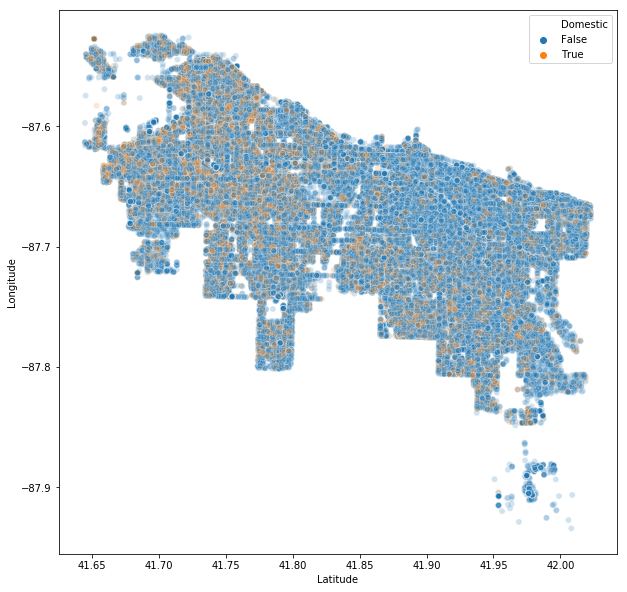

In [12]:
# Areas with domestic violence

plt.figure(figsize=(10,10))
sns.scatterplot(x='Latitude', y='Longitude', hue='Domestic', alpha=0.2, data=data)

This is quiet surprising. It looks like crimes are thorugh all around Chicago. Maybe we should narrow down to specific crime.

In [13]:
data.head(2)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,22,74.0,14,1158309.0,1829936.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)"
1,12/31/2018 11:59:00 PM,013XX W 72ND ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,7,67.0,11,1168573.0,1857018.0,2018,41.763181,-87.657709,"(41.763181359, -87.657709477)"


In [14]:
serious_data = data[['Primary Type', 'Latitude', 'Longitude']]

In [15]:
serious_data = serious_data.groupby('Primary Type')

In [17]:
serious_crime = ['THEFT', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'HUMAN TRAFFICKING',
                'KIDNAPPING', 'NARCOTICS', 'PROSTITUTION', 'ROBBERY', 'SEX OFFENSE']

In [18]:
serious_data = data[data['Primary Type'].isin(serious_crime)]

In [19]:
serious_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
3,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,12,31.0,08B,1168327.0,1891230.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)"
4,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,6,71.0,08B,1171332.0,1852934.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)"
5,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,15,25.0,04B,1140262.0,1897810.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)"
6,12/31/2018 11:48:00 PM,079XX S LAFLIN ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,6,71.0,08B,1167710.0,1852264.0,2018,41.750154,-87.661009,"(41.750154295, -87.661008708)"
7,12/31/2018 11:47:00 PM,018XX W BELMONT AVE,BATTERY,SIMPLE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER...",False,False,19,5.0,08B,1163636.0,1921279.0,2018,41.939625,-87.673996,"(41.939624824, -87.67399611)"


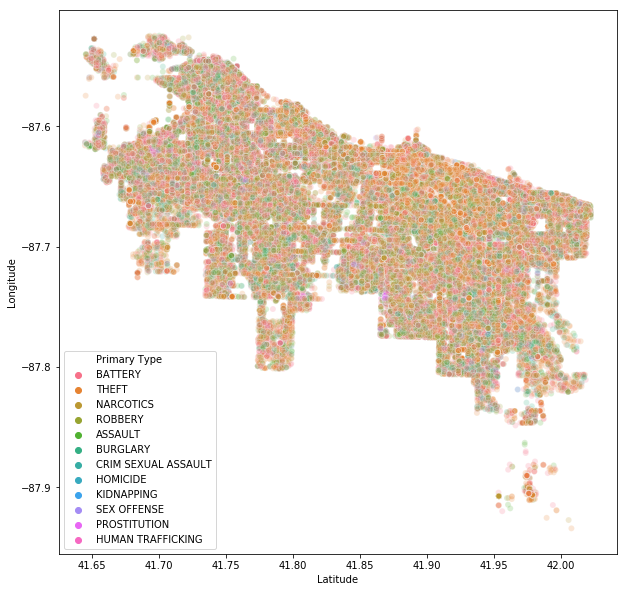

In [20]:
# Areas with serious violence

plt.figure(figsize=(10,10))
sns.scatterplot(x='Latitude', y='Longitude', hue=serious_data['Primary Type'], alpha=0.2, data=data)

WHAT THE HECK IS WRONG WITH CHICAGO?! Every crime is just .... everywhere!